In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Load Resturant dataset

In [3]:
df=pd.read_csv('/content/Restaurant_Risk _DataSet .csv')

In [4]:
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,NaN,NaN,NaN,1.415578e+10,...,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.729016,-122.419253,POINT (-122.419253 37.729016),1.415546e+10,...,NaN,Reinspection/Followup,NaN,NaN,NaN,92.0,92.0,2.0,2.0,7.0
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,NaN,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.763156,-122.410351,POINT (-122.410351 37.763156),NaN,...,NaN,Reinspection/Followup,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,NaN,NaN,NaN,NaN,...,96.0,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(53973, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   53973 non-null  int64  
 1   business_name                 53973 non-null  object 
 2   business_address              53973 non-null  object 
 3   business_city                 53973 non-null  object 
 4   business_state                53973 non-null  object 
 5   business_postal_code          52787 non-null  object 
 6   business_latitude             27475 non-null  float64
 7   business_longitude            27475 non-null  float64
 8   business_location             27460 non-null  object 
 9   business_phone_number         17672 non-null  float64
 10  inspection_id                 53973 non-null  object 
 11  inspection_date               53973 non-null  object 
 12  inspection_score              39541 non-null  float64
 13  i

In [7]:
#check duplicated rows
df.duplicated().sum()

43

In [8]:
#drop this duplicated rows
df.drop_duplicates(inplace=True)

#Handling Missing Values

In [9]:
#drop unnessary column like address related column
df.drop(columns=['business_latitude','business_location','Neighborhoods',
                 'SF Find Neighborhoods','Analysis Neighborhoods','Current Supervisor Districts'
                 ,'Current Police Districts','business_longitude','business_phone_number'], inplace=True)

In [10]:
#check the shape
df.shape

(53930, 13)

In [11]:
df.dropna(subset=['business_postal_code'], inplace=True)

In [12]:
# Fill 'inspection_score' with the mean
df['inspection_score'].fillna(df['inspection_score'].mean(), inplace=True)

In [13]:
df['inspection_score']=df['inspection_score'].astype(int)

In [14]:
df['inspection_score'].unique()

array([100,  86,  96,  92,  78,  90,  89,  70,  84,  91,  85,  66,  74,
        83,  94,  71,  87,  76,  82,  98,  88,  46,  75,  81,  67,  79,
        77,  80,  72,  68,  73,  93,  65,  55,  69,  48,  62,  64,  60,
        63,  59,  61,  58,  57,  51,  54,  45])

In [15]:
#Filled  null value in 0 in violation_id it means no violation
df['violation_id'].fillna(0, inplace=True)

In [16]:
#filled null value in description column in no description
df['violation_description'].fillna('No Violation', inplace=True)

In [17]:
df['risk_category'].fillna('Low Risk', inplace=True)

In [18]:
#check the nullvales in dataset
df.isnull().sum()

,0
business_id,0
business_name,0
business_address,0
business_city,0
business_state,0
business_postal_code,0
inspection_id,0
inspection_date,0
inspection_score,0
inspection_type,0


In [19]:
#check the shape
df.shape

(52745, 13)

In [20]:
df1=df.copy()

In [21]:
#resturant with violation of law has violation_id new column on law violation
df['law_violation']=np.where(df['violation_id']!=0, 'Yes', 'No')

In [22]:
df['law_violation'].value_counts()

,count
law_violation,
Yes,39407
No,13338


In [23]:
df['violation_id'].nunique()

39408

#Filter out the description column in 4 categories 'Hygiene','Legal','Noncompliance', 'Lack_Infrastructure'.

In [24]:
#converting violation description to 4 categories 'Hygiene','Legal','Noncompliance', 'Lack_Infrastructure'
violation_hygiene = dict.fromkeys(['Unclean or degraded floors walls or ceilings',
'Wiping cloths not clean or properly stored or inadequate sanitizer', 'Moderate risk vermin infestation',
'Unclean nonfood contact surfaces', 'Foods not protected from contamination', 'Unclean hands or improper use of gloves',
'High risk vermin infestation', 'Inadequately cleaned or sanitized food contact surfaces', 'Low risk vermin infestation',
'Unclean or unsanitary food contact surfaces', 'Employee eating or smoking', 'Contaminated or adulterated food',
'Unsanitary employee garments hair or nails', 'Other low risk violation', 'Unclean unmaintained or improperly constructed toilet facilities',
'Other moderate risk violation', 'Sewage or wastewater contamination', 'Food in poor condition', 'Other high risk violation',
'Reservice of previously served foods', 'Discharge from employee nose mouth or eye',
'Improperly washed fruits and vegetables'], 'Hygiene')
violation_lack_infra = dict.fromkeys(['Inadequate and inaccessible handwashing facilities',
'Inadequate or unsanitary refuse containers or area or no garbage service', 'No thermometers or uncalibrated thermometers',
'Improper or defective plumbing', 'No hot water or running water',  'No restroom facility within 200 feet of mobile food facility',
'Inadequate ventilation or lighting', 'Inadequate warewashing facilities or equipment',
'Inadequate sewage or wastewater disposal', 'Insufficient hot water or running water'],'Lack_Infrastructure')
violation_legal = dict.fromkeys(['Food safety certificate or food handler card not available',
'Unapproved or unmaintained equipment or utensils', 'Permit license or inspection report not posted',
'No plan review or Building Permit', 'Unapproved  living quarters in food facility', 'Unpermitted food facility',
'Unapproved food source', 'Mobile food facility stored in unapproved location',
'Mobile food facility with unapproved operating conditions',
'Mobile food facility not operating with an approved commissary'],'Legal')
violation_noncompliance = dict.fromkeys(['High risk food holding temperature',
'Inadequate food safety knowledge or lack of certified food safety manager',
'Improper storage of equipment utensils or linens', 'Improper food storage', 'Improper thawing methods',
'Moderate risk food holding temperature', 'Improper cooling methods',
'Improper storage use or identification of toxic substances', 'Improper food labeling or menu misrepresentation',
'Improperly displayed mobile food permit or signage', 'Non service animal',
'Noncompliance with shell fish tags or display', 'Noncompliance with HAACP plan or variance',
'Inadequate HACCP plan record keeping', 'Inadequate dressing rooms or improper storage of personal items',
'Improper reheating of food', 'Inadequate procedures or records for time as a public health control',
'Worker safety hazards', 'No person in charge of food facility', 'Improper cooking time or temperatures',
'Unauthorized or unsafe use of time as a public health control measure',
'Consumer advisory not provided for raw or undercooked foods', 'Noncompliance with Gulf Coast oyster regulation',
'Noncompliance with Cottage Food Operation'],'Noncompliance')


In [25]:
#apply this key word in description all category
df = df.replace(violation_hygiene)
df = df.replace(violation_lack_infra)
df = df.replace(violation_legal)
df = df.replace(violation_noncompliance)

In [26]:
# Rename the column 'violation_description' to 'violation_type'
df.rename(columns={'violation_description': 'violation_type'}, inplace=True)

In [27]:
df['violation_type'].value_counts()

,count
violation_type,
Hygiene,17995
No Violation,13338
Noncompliance,10833
Lack_Infrastructure,5625
Legal,4954


In [28]:
#save the cleaned dataset
df.to_csv('cleaned_Resturant_dataset.csv', index=False)

In [29]:
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_type,risk_category,law_violation
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,85936_20170925,09/25/2017 12:00:00 AM,100,Routine - Unscheduled,0,No Violation,Low Risk,No
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,5827_20170224,02/24/2017 12:00:00 AM,86,Reinspection/Followup,0,No Violation,Low Risk,No
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,94910_20180530,05/30/2018 12:00:00 AM,86,New Ownership - Followup,0,No Violation,Low Risk,No
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,64667_20170814,08/14/2017 12:00:00 AM,86,Reinspection/Followup,0,No Violation,Low Risk,No
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,97722_20181217,12/17/2018 12:00:00 AM,96,Routine - Unscheduled,97722_20181217_103154,Hygiene,Low Risk,Yes


In [30]:
df.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'inspection_id',
       'inspection_date', 'inspection_score', 'inspection_type',
       'violation_id', 'violation_type', 'risk_category', 'law_violation'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52745 entries, 0 to 53972
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   business_id           52745 non-null  int64 
 1   business_name         52745 non-null  object
 2   business_address      52745 non-null  object
 3   business_city         52745 non-null  object
 4   business_state        52745 non-null  object
 5   business_postal_code  52745 non-null  object
 6   inspection_id         52745 non-null  object
 7   inspection_date       52745 non-null  object
 8   inspection_score      52745 non-null  int64 
 9   inspection_type       52745 non-null  object
 10  violation_id          52745 non-null  object
 11  violation_type        52745 non-null  object
 12  risk_category         52745 non-null  object
 13  law_violation         52745 non-null  object
dtypes: int64(2), object(12)
memory usage: 8.1+ MB


In [32]:
df.shape

(52745, 14)

In [33]:
#checking for unique columns values
df.apply(lambda x : len(x.unique()))

,0
business_id,6059
business_name,5615
business_address,5560
business_city,1
business_state,1
business_postal_code,62
inspection_id,25971
inspection_date,807
inspection_score,47
inspection_type,15



business_city,\
business_state,\
These columns are only one unique iteam that doesn't affect on ml model

In [34]:
# Drop unnecessary columns for model training
df = df.drop(columns=['business_city', 'business_state'])

In [35]:
# Define bins for inspection scores
bins = [0, 60, 85, 100]
labels = ['Low', 'Medium', 'High']
df['inspection_score_category'] = pd.cut(df['inspection_score'], bins=bins, labels=labels)

In [36]:
# Convert inspection_date to datetime format
df['inspection_date'] = pd.to_datetime(df['inspection_date'])

# Extract year, month, day of the week
df['inspection_year'] = df['inspection_date'].dt.year
df['inspection_month'] = df['inspection_date'].dt.month
df['inspection_dayofweek'] = df['inspection_date'].dt.dayofweek

In [37]:
# Create a feature that counts the number of violations per inspection_id
df['violation_count'] = df.groupby('inspection_id')['violation_id'].transform('count')

In [38]:
# Drop the inspection_id,violation_id  column as it is not useful for model training
df = df.drop(columns=['inspection_id','violation_id','business_id'])

In [39]:
df['inspection_type'].value_counts()

,count
inspection_type,
Routine - Unscheduled,38776
Reinspection/Followup,6621
Complaint,2377
New Ownership,1871
New Construction,976
Non-inspection site visit,841
New Ownership - Followup,529
Structural Inspection,240
Complaint Reinspection/Followup,228


In [40]:
#Since inspection_type has many category so converting the categories into four general categories:
#'Routine', 'Complaint', 'New', 'Investigation'

df_routine= dict.fromkeys(['Routine - Unscheduled', 'Reinspection/Followup', 'Routine - Scheduled'], 'Routine')
df_complaint= dict.fromkeys(['Complaint', 'Complaint Reinspection/Followup'], 'Complaint')
df_new= dict.fromkeys(['New Ownership', 'New Ownership - Followup'], 'New_Ownership')

In [41]:
df = df.replace(df_routine)
df = df.replace(df_complaint)
df = df.replace(df_new)

In [42]:
df.head()

,business_name,business_address,business_postal_code,inspection_date,inspection_score,inspection_type,violation_type,risk_category,law_violation,inspection_score_category,inspection_year,inspection_month,inspection_dayofweek,violation_count
0,Laurel Court,950 Mason St,94108,2017-09-25,100,Routine,No Violation,Low Risk,No,High,2017,9,0,1
1,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,94134,2017-02-24,86,Routine,No Violation,Low Risk,No,High,2017,2,4,1
2,Ike's Kitchen,800 Van Ness Ave,94109,2018-05-30,86,New_Ownership,No Violation,Low Risk,No,High,2018,5,2,1
3,Jasmine Rae Bakery,1890 Bryant St #309,94110,2017-08-14,86,Routine,No Violation,Low Risk,No,High,2017,8,0,1
4,THE CHURRO FACTORY,PIER 39 K-01,94133,2018-12-17,96,Routine,Hygiene,Low Risk,Yes,High,2018,12,0,2


In [43]:
df.dtypes

,0
business_name,object
business_address,object
business_postal_code,object
inspection_date,datetime64[ns]
inspection_score,int64
inspection_type,object
violation_type,object
risk_category,object
law_violation,object
inspection_score_category,category


In [44]:
#check the data description
df.describe()

,inspection_date,inspection_score,inspection_year,inspection_month,inspection_dayofweek,violation_count
count,52745,52745.000000,52745.000000,52745.000000,52745.000000,52745.000000
mean,2018-05-19 17:45:40.422789120,86.127159,2017.899080,6.317149,1.917888,3.344108
min,2016-10-04 00:00:00,45.000000,2016.000000,1.000000,0.000000,1.000000
25%,2017-09-15 00:00:00,84.000000,2017.000000,3.000000,1.000000,1.000000
50%,2018-05-14 00:00:00,86.000000,2018.000000,6.000000,2.000000,3.000000
75%,2019-03-13 00:00:00,90.000000,2019.000000,9.000000,3.000000,5.000000
max,2019-11-28 00:00:00,100.000000,2019.000000,12.000000,6.000000,15.000000
std,NaN,7.269461,0.943696,3.371480,1.349518,2.193283


#Data exploration and visualization

In [45]:
df['risk_category'].value_counts()

,count
risk_category,
Low Risk,32020
Moderate Risk,15025
High Risk,5700


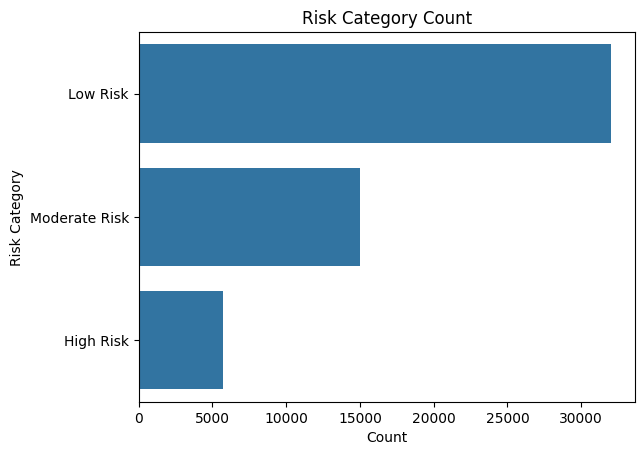

In [46]:
sns.countplot(df['risk_category'])
plt.title('Risk Category Count')
plt.ylabel('Risk Category')
plt.xlabel('Count')
plt.show()

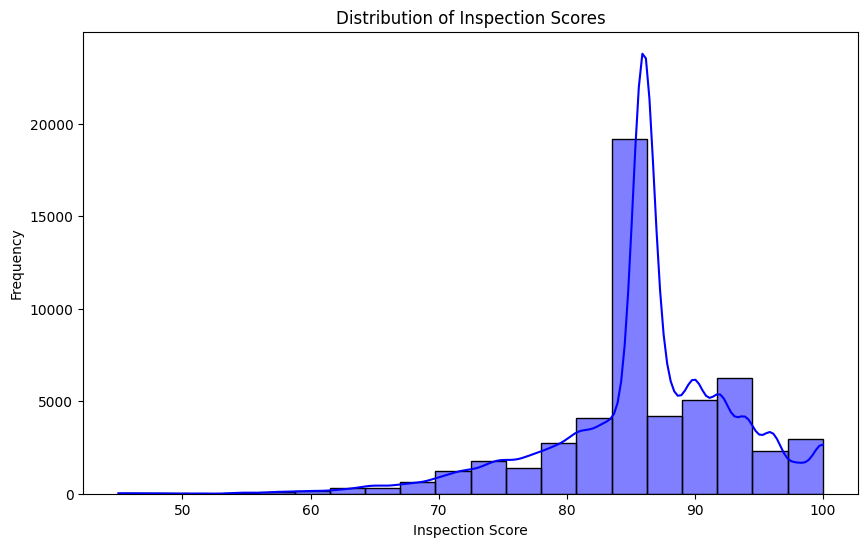

In [47]:
# Plot the distribution of inspection scores
plt.figure(figsize=(10,6))
sns.histplot(df['inspection_score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Inspection Scores')
plt.xlabel('Inspection Score')
plt.ylabel('Frequency')
plt.show()

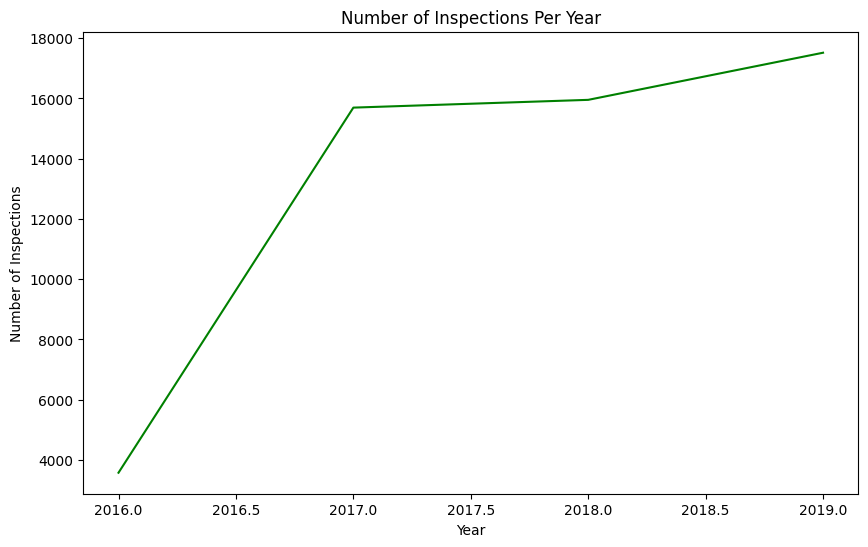

In [48]:
# Line plot of number of inspections per year
df.groupby('inspection_year').size().plot(kind='line', figsize=(10,6), color='green')
plt.title('Number of Inspections Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Inspections')
plt.show()


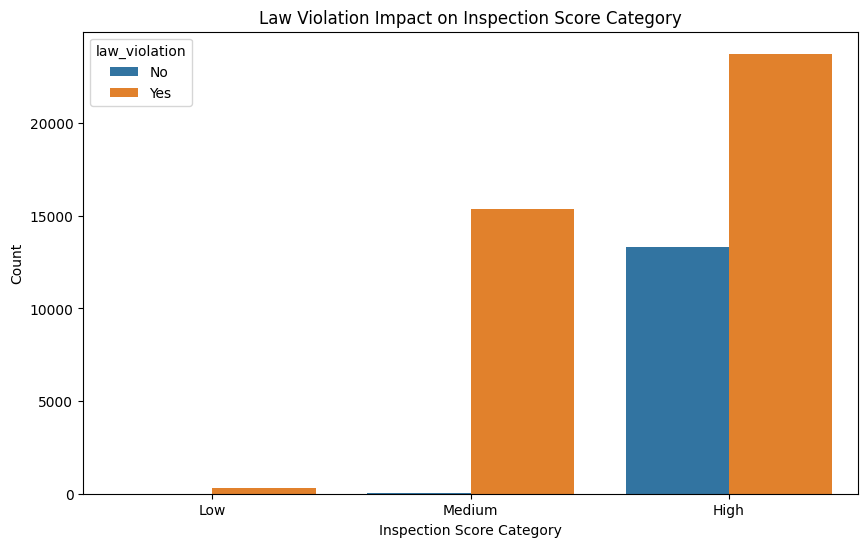

In [49]:
# Law violation impact on inspection score category
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='inspection_score_category', hue='law_violation')
plt.title('Law Violation Impact on Inspection Score Category')
plt.xlabel('Inspection Score Category')
plt.ylabel('Count')
plt.show()


<Figure size 1400x600 with 0 Axes>

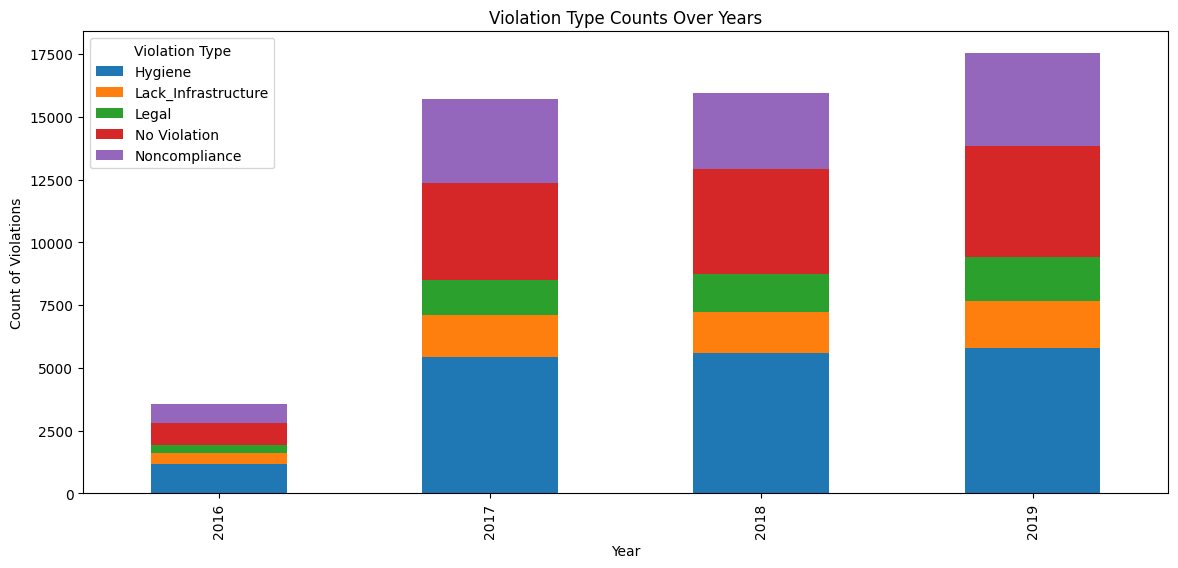

In [50]:
# Count of violation types over the years
plt.figure(figsize=(14, 6))
violation_counts = df.groupby(['inspection_year', 'violation_type']).size().unstack()
violation_counts.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Violation Type Counts Over Years')
plt.xlabel('Year')
plt.ylabel('Count of Violations')
plt.legend(title='Violation Type')
plt.show()


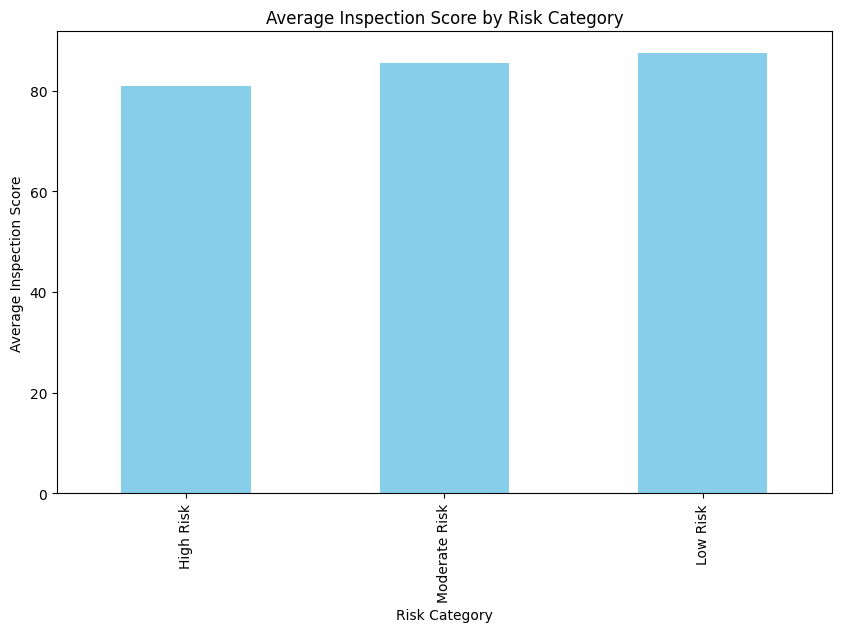

In [51]:
# Bar plot of average inspection score by risk category
plt.figure(figsize=(10, 6))
avg_score_by_risk = df.groupby('risk_category')['inspection_score'].mean().sort_values()
avg_score_by_risk.plot(kind='bar', color='skyblue')
plt.title('Average Inspection Score by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Average Inspection Score')
plt.show()


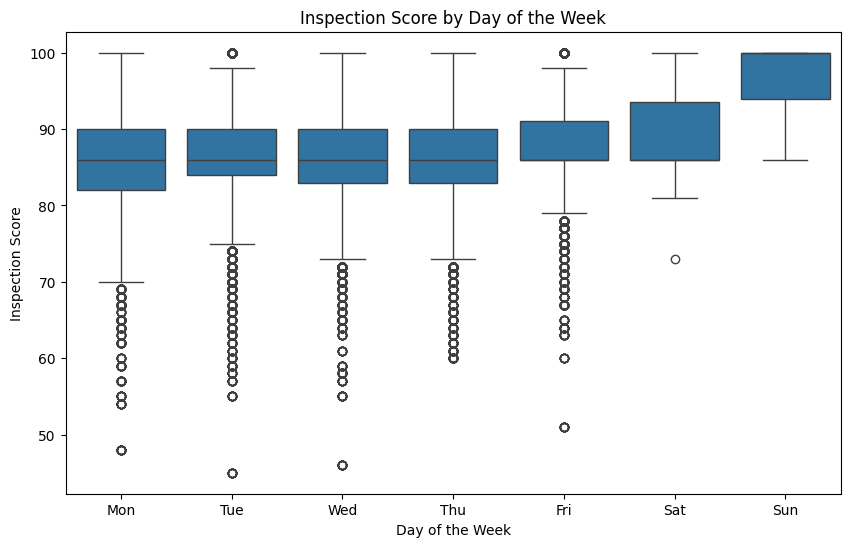

In [52]:
# Boxplot of inspection scores by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='inspection_dayofweek', y='inspection_score', data=df)
plt.title('Inspection Score by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Inspection Score')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


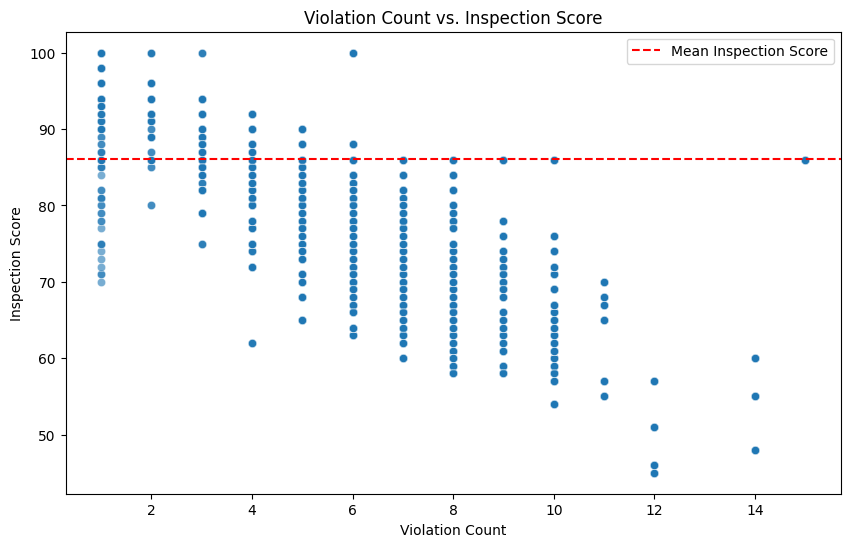

In [53]:
# Scatter plot for violation count vs. inspection score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='violation_count', y='inspection_score', data=df, alpha=0.6)
plt.title('Violation Count vs. Inspection Score')
plt.xlabel('Violation Count')
plt.ylabel('Inspection Score')
plt.axhline(y=df['inspection_score'].mean(), color='r', linestyle='--', label='Mean Inspection Score')
plt.legend()
plt.show()


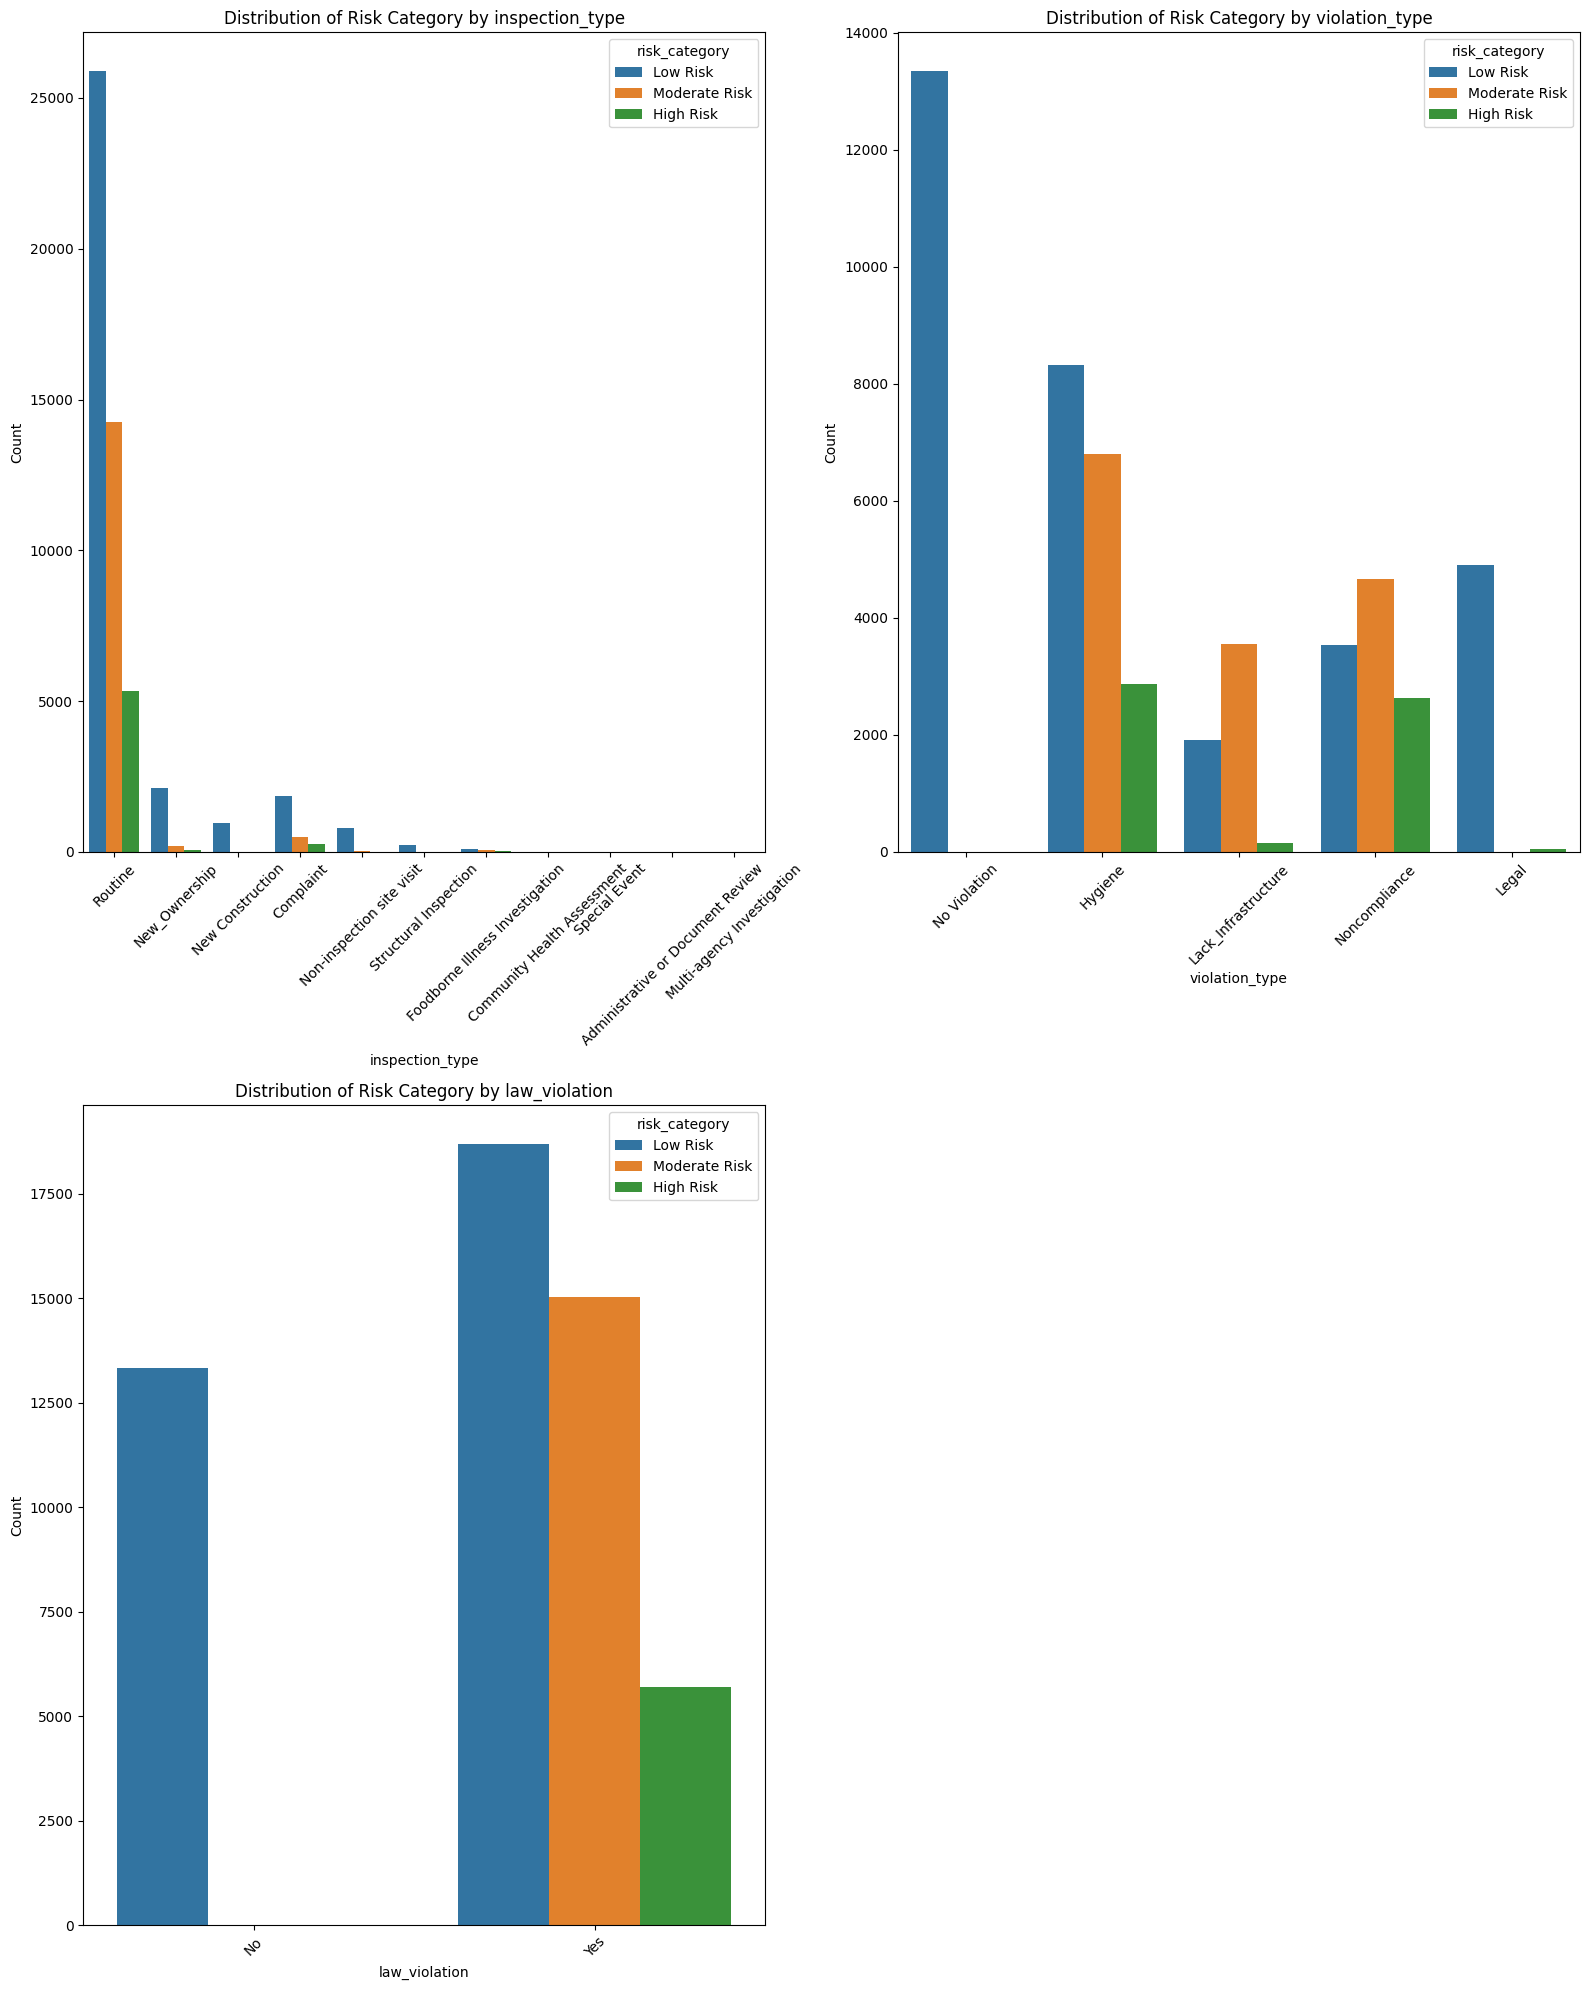

In [54]:

# List of categorical features to compare
categorical_features = ['inspection_type', 'violation_type', 'law_violation']

# Create subplots for each categorical feature
plt.figure(figsize=(16, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=feature, hue='risk_category')
    plt.title(f'Distribution of Risk Category by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


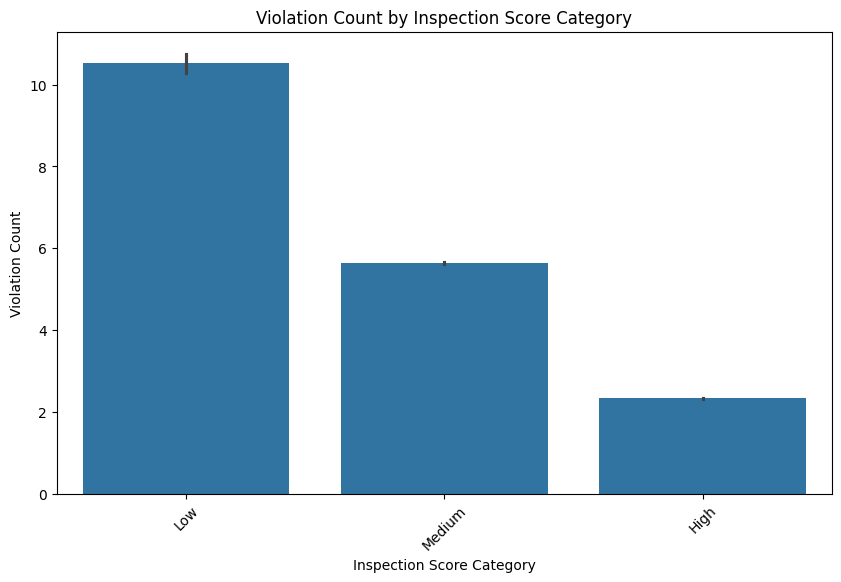

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='inspection_score_category', y='violation_count')

# Adding title and labels
plt.title('Violation Count by Inspection Score Category')
plt.xlabel('Inspection Score Category')
plt.ylabel('Violation Count')
plt.xticks(rotation=45)
plt.show()

Top 10 bussiness group has highest violation count

In [56]:
group_businss=df.groupby('business_name')['violation_count'].sum().reset_index()
top_violations = group_businss.sort_values(by='violation_count', ascending=False)
top_10_businesses = top_violations.head(10)

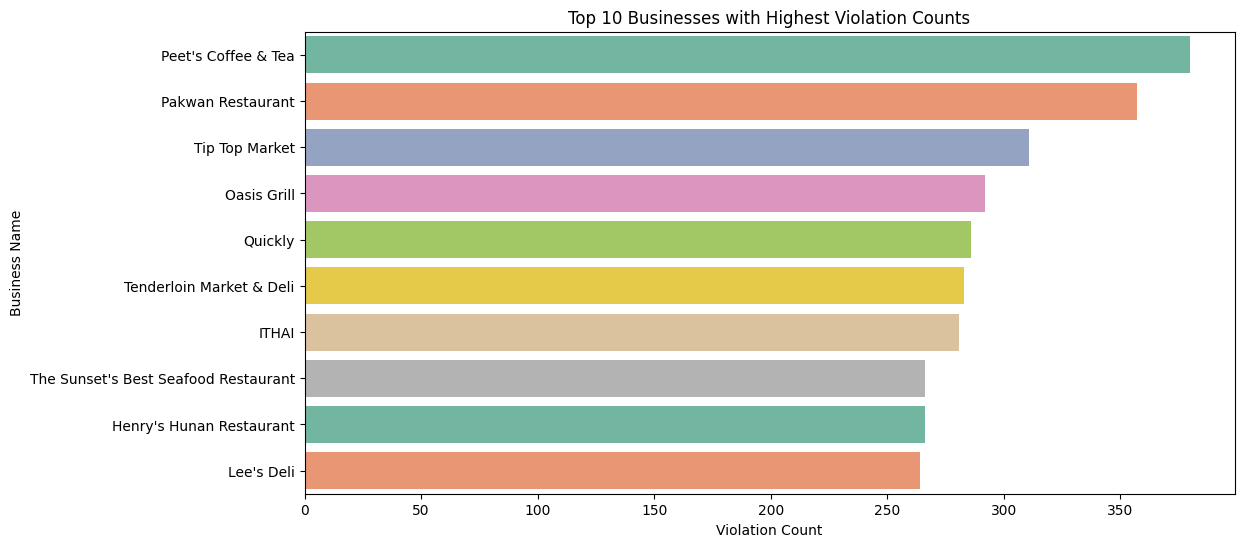

In [57]:
# Bar plot of top 10 businesses with highest violation counts
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_businesses, x='violation_count', y='business_name', palette='Set2')
plt.title('Top 10 Businesses with Highest Violation Counts')
plt.xlabel('Violation Count')
plt.ylabel('Business Name')
plt.show()


top 10 business has lowest inspection_score

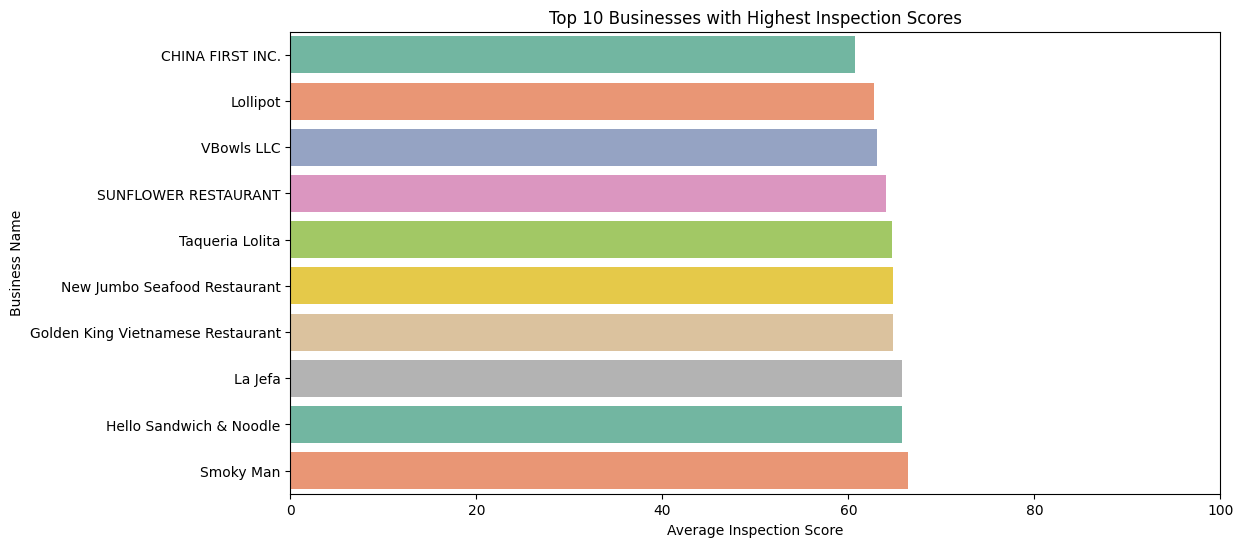

In [58]:
# Group by 'business_name' and calculate the mean of 'inspection_score'
top_inspection_scores = df.groupby('business_name')['inspection_score'].mean().reset_index()
top_inspection_scores = top_inspection_scores.sort_values(by='inspection_score', ascending=True)
# Get the top 10 businesses lowest inspection score
top_10_businesses = top_inspection_scores.head(10)

# Bar plot of top 10 businesses with highest inspection scores
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_businesses, x='inspection_score', y='business_name', palette='Set2')
plt.title('Top 10 Businesses with Highest Inspection Scores')
plt.xlabel('Average Inspection Score')
plt.ylabel('Business Name')
plt.xlim(0,100)
plt.show()

In [59]:
df.dtypes

,0
business_name,object
business_address,object
business_postal_code,object
inspection_date,datetime64[ns]
inspection_score,int64
inspection_type,object
violation_type,object
risk_category,object
law_violation,object
inspection_score_category,category


In [60]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [61]:
df.head()

,business_name,business_address,business_postal_code,inspection_date,inspection_score,inspection_type,violation_type,risk_category,law_violation,inspection_score_category,inspection_year,inspection_month,inspection_dayofweek,violation_count
0,Laurel Court,950 Mason St,94108,2017-09-25,100,Routine,No Violation,Low Risk,No,High,2017,9,0,1
1,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,94134,2017-02-24,86,Routine,No Violation,Low Risk,No,High,2017,2,4,1
2,Ike's Kitchen,800 Van Ness Ave,94109,2018-05-30,86,New_Ownership,No Violation,Low Risk,No,High,2018,5,2,1
3,Jasmine Rae Bakery,1890 Bryant St #309,94110,2017-08-14,86,Routine,No Violation,Low Risk,No,High,2017,8,0,1
4,THE CHURRO FACTORY,PIER 39 K-01,94133,2018-12-17,96,Routine,Hygiene,Low Risk,Yes,High,2018,12,0,2


In [62]:
categorical_cols

['business_name',
 'business_address',
 'business_postal_code',
 'inspection_type',
 'violation_type',
 'risk_category',
 'law_violation',
 'inspection_score_category']

In [63]:
df2=df.copy()

#convert categorical column in numerical column

In [64]:
# risk_category in to numerial
df['risk_category'] = df['risk_category'].replace({'Low Risk': 0, 'Moderate Risk': 1, 'High Risk': 2})
df['risk_category'] = df['risk_category'].astype(int)

0:-Low Risk\
1:-Moderate Risk\
2:-High Risk

In [65]:
df['inspection_score_category'].value_counts()

,count
inspection_score_category,
High,37060
Medium,15401
Low,284


In [66]:
df['inspection_score_category']=df['inspection_score_category'].replace({'Low':1 , 'Medium': 2, 'High': 3})
df['inspection_score_category']=df['inspection_score_category'].astype(int)

In [67]:
df['violation_type'].value_counts()

,count
violation_type,
Hygiene,17995
No Violation,13338
Noncompliance,10833
Lack_Infrastructure,5625
Legal,4954


In [68]:
le=LabelEncoder()
df['violation_type']=le.fit_transform(df['violation_type'])

In [69]:
df['law_violation']=le.fit_transform(df['law_violation'])

In [70]:
df['inspection_type']=le.fit_transform(df['inspection_type'])

In [71]:
#drop date column date column
df.drop(columns=['inspection_date'], inplace=True)

we keeping the name and address intact because location may influence risk category

In [72]:
df['business_name']=le.fit_transform(df['business_name'])
df['business_address']=le.fit_transform(df['business_address'])
df['business_postal_code']=le.fit_transform(df['business_postal_code'])

In [73]:
df.dtypes

,0
business_name,int64
business_address,int64
business_postal_code,int64
inspection_score,int64
inspection_type,int64
violation_type,int64
risk_category,int64
law_violation,int64
inspection_score_category,int64
inspection_year,int32


In [74]:
df.head()

,business_name,business_address,business_postal_code,inspection_score,inspection_type,violation_type,risk_category,law_violation,inspection_score_category,inspection_year,inspection_month,inspection_dayofweek,violation_count
0,2793,5407,17,100,8,3,0,0,3,2017,9,0,1
1,2067,5109,43,86,8,3,0,0,3,2017,2,4,1
2,2319,5082,18,86,6,3,0,0,3,2018,5,2,1
3,2435,1500,19,86,8,3,0,0,3,2017,8,0,1
4,4780,5498,42,96,8,0,0,1,3,2018,12,0,2


In [75]:
X=df.drop(columns=['risk_category'])
y=df['risk_category']

#spliting the dataset in train and test dataset

In [76]:
#spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Builing Model

In [77]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [78]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Find the best model
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

# Print results
print("Model Accuracy Results:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

print(f"\nBest Model: {best_model} with accuracy: {best_accuracy:.4f}")

Model Accuracy Results:
Logistic Regression: 0.5895
Random Forest: 0.6744
SVM: 0.6035
Decision Tree: 0.6637
KNN: 0.5510
Naive Bayes: 0.5280

Best Model: Random Forest with accuracy: 0.6744


#HyperParameter Tuning to increase accuracy

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model
best_rf_model = random_search.best_estimator_

# Predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Accuracy: 0.7064176699213196
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      6366
           1       0.56      0.61      0.58      3029
           2       0.49      0.38      0.43      1154

    accuracy                           0.71     10549
   macro avg       0.62      0.60      0.61     10549
weighted avg       0.70      0.71      0.70     10549



It increase only 2% accuracy from 68% to 70%

#save the model

In [80]:
import joblib
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']